# Applying Machine Learning Algorithms:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
rcParams['figure.figsize'] = (8.0, 5.0)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
file_1 = pd.read_csv('../input/churn-prediction-of-bank-customers/Churn_Modelling.csv')

In [4]:
df_orig = pd.DataFrame(file_1)

In [5]:
df_orig.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df = df_orig.copy()

In [7]:
# Dropping the id and name columns.
df.drop('CustomerId', axis=1, inplace=True)
df.drop('Surname', axis=1, inplace=True)
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
RowNumber          10000 non-null int64
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [9]:
# Converting NumOfProducts column to categorical.
df['NumOfProducts'] = df['NumOfProducts'].astype(int)
df['NumOfProducts'] = df['NumOfProducts'].astype(object)

In [10]:
# Creating seperate columns for categories
df = pd.get_dummies(df)
df.head()

,RowNumber,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,1,619,42,2,0.00,1,1,101348.88,1,1,0,0,1,0,1,0,0,0
1,2,608,41,1,83807.86,0,1,112542.58,0,0,0,1,1,0,1,0,0,0
2,3,502,42,8,159660.80,1,0,113931.57,1,1,0,0,1,0,0,0,1,0
3,4,699,39,1,0.00,0,0,93826.63,0,1,0,0,1,0,0,1,0,0
4,5,850,43,2,125510.82,1,1,79084.10,0,0,0,1,1,0,1,0,0,0


In [11]:
# Dropping excess columns
df.drop('Geography_Spain', axis=1, inplace=True)
df.drop('Gender_Male', axis=1, inplace=True)
df.drop('NumOfProducts_2', axis=1, inplace=True)
df.head()

,RowNumber,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Gender_Female,NumOfProducts_1,NumOfProducts_3,NumOfProducts_4
0,1,619,42,2,0.00,1,1,101348.88,1,1,0,1,1,0,0
1,2,608,41,1,83807.86,0,1,112542.58,0,0,0,1,1,0,0
2,3,502,42,8,159660.80,1,0,113931.57,1,1,0,1,0,1,0
3,4,699,39,1,0.00,0,0,93826.63,0,1,0,1,0,0,0
4,5,850,43,2,125510.82,1,1,79084.10,0,0,0,1,1,0,0


In [12]:
df.columns

Index(['RowNumber', 'CreditScore', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Gender_Female', 'NumOfProducts_1',
       'NumOfProducts_3', 'NumOfProducts_4'],
      dtype='object')

In [13]:
df = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_France', 'Gender_Female', 'NumOfProducts_1',
       'NumOfProducts_4', 'NumOfProducts_3', 'Exited']] 

In [14]:
# Correlation Matrix
corr = df.corr()
corr.style.background_gradient()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_France,Gender_Female,NumOfProducts_1,NumOfProducts_4,NumOfProducts_3,Exited
CreditScore,1,-0.00396491,0.000841942,0.00626838,-0.00545848,0.0256513,-0.00138429,0.00553755,-0.00892807,0.00285662,-0.0148133,0.00245546,-0.00414524,-0.0270935
Age,-0.00396491,1,-0.00999683,0.0283084,-0.011721,0.0854721,-0.00720104,0.0468971,-0.0392077,0.027544,0.0728522,0.0500916,0.0673651,0.285323
Tenure,0.000841942,-0.00999683,1,-0.0122539,0.0225829,-0.0283621,0.00778383,-0.000567498,-0.00284778,-0.0147331,-0.0134233,0.0077155,-0.000516761,-0.0140006
Balance,0.00626838,0.0283084,-0.0122539,1,-0.0148583,-0.0100841,0.0127975,0.40111,-0.231329,-0.0120866,0.359646,0.0214762,-0.00272244,0.118533
HasCrCard,-0.00545848,-0.011721,0.0225829,-0.0148583,1,-0.0118656,-0.00993341,0.0105766,0.00246722,-0.00576612,-0.00384506,-0.00377826,0.00318626,-0.00713777
IsActiveMember,0.0256513,0.0854721,-0.0283621,-0.0100841,-0.0118656,1,-0.0114214,-0.0204858,0.00331697,-0.0225443,-0.0223207,-0.00493835,-0.0298644,-0.156128
EstimatedSalary,-0.00138429,-0.00720104,0.00778383,0.0127975,-0.00993341,-0.0114214,1,0.0102971,-0.00333164,0.00811234,-0.0106629,0.0063139,0.0121533,0.0120969
Geography_Germany,0.00553755,0.0468971,-0.000567498,0.40111,0.0105766,-0.0204858,0.0102971,1,-0.580359,0.0246279,0.0338775,0.0267202,0.0419446,0.173488
Geography_France,-0.00892807,-0.0392077,-0.00284778,-0.231329,0.00246722,0.00331697,-0.00333164,-0.580359,1,-0.00677245,-0.0140491,-0.00280732,-0.0365077,-0.104955
Gender_Female,0.00285662,0.027544,-0.0147331,-0.0120866,-0.00576612,-0.0225443,0.00811234,0.0246279,-0.00677245,1,-0.00548822,0.0279362,0.035143,0.106512


In [15]:
# Converting all Balances more than 0 to 1
df['Balance'] = df['Balance'].clip(upper=1)

In [16]:
# Dropping insignificant features as decided during previous excercises.
# Age p-value = 0.0
# Credit Score p-value = 0.0085
# Balance p-value = 0.0
# Estimated Salary p-value = 0.1222
df.drop('EstimatedSalary', axis=1, inplace=True)
df.drop('HasCrCard', axis=1, inplace=True)
#df.drop('NumOfProducts', axis=1, inplace=True)
df.drop('Tenure', axis=1, inplace=True)
df.head()

,CreditScore,Age,Balance,IsActiveMember,Geography_Germany,Geography_France,Gender_Female,NumOfProducts_1,NumOfProducts_4,NumOfProducts_3,Exited
0,619,42,0.0,1,0,1,1,1,0,0,1
1,608,41,1.0,1,0,0,1,1,0,0,0
2,502,42,1.0,0,0,1,1,0,0,1,1
3,699,39,0.0,0,0,1,1,0,0,0,0
4,850,43,1.0,1,0,0,1,1,0,0,0


In [17]:
df = df.applymap(np.int64)

In [18]:
df.loc[df.Balance == 0, 'Balance'] = -1
df.loc[df.IsActiveMember == 0, 'IsActiveMember'] = -1
df.loc[df.Geography_Germany == 0, 'Geography_Germany'] = -1
df.loc[df.Geography_France == 0, 'Geography_France'] = -1
df.loc[df.Gender_Female == 0, 'Gender_Female'] = -1
df.loc[df.NumOfProducts_1 == 0, 'NumOfProducts_1'] = -1
df.loc[df.NumOfProducts_3 == 0, 'NumOfProducts_3'] = -1
df.loc[df.NumOfProducts_4 == 0, 'NumOfProducts_4'] = -1
df.loc[df.Exited == 0, 'Exited'] = -1
df.head()

,CreditScore,Age,Balance,IsActiveMember,Geography_Germany,Geography_France,Gender_Female,NumOfProducts_1,NumOfProducts_4,NumOfProducts_3,Exited
0,619,42,-1,1,-1,1,1,1,-1,-1,1
1,608,41,1,1,-1,-1,1,1,-1,-1,-1
2,502,42,1,-1,-1,1,1,-1,-1,1,1
3,699,39,-1,-1,-1,1,1,-1,-1,-1,-1
4,850,43,1,1,-1,-1,1,1,-1,-1,-1


In [19]:
# Scaling the data
from sklearn.preprocessing import scale

df['CreditScore'] = scale(df['CreditScore'])
df['Age'] = scale(df['Age'])
#df['Tenure'] = scale(df['Tenure'])
#df['NumOfProducts'] = scale(df['NumOfProducts'])

df.head()

,CreditScore,Age,Balance,IsActiveMember,Geography_Germany,Geography_France,Gender_Female,NumOfProducts_1,NumOfProducts_4,NumOfProducts_3,Exited
0,-0.326221,0.293517,-1,1,-1,1,1,1,-1,-1,1
1,-0.440036,0.198164,1,1,-1,-1,1,1,-1,-1,-1
2,-1.536794,0.293517,1,-1,-1,1,1,-1,-1,1,1
3,0.501521,0.007457,-1,-1,-1,1,1,-1,-1,-1,-1
4,2.063884,0.388871,1,1,-1,-1,1,1,-1,-1,-1


In [20]:
df.columns

Index(['CreditScore', 'Age', 'Balance', 'IsActiveMember', 'Geography_Germany',
       'Geography_France', 'Gender_Female', 'NumOfProducts_1',
       'NumOfProducts_4', 'NumOfProducts_3', 'Exited'],
      dtype='object')

In [21]:
X = df[['CreditScore', 'Age', 'Balance', 'IsActiveMember', 'Geography_Germany',
       'Geography_France', 'Gender_Female', 'NumOfProducts_1',
       'NumOfProducts_4', 'NumOfProducts_3']]
y = df['Exited']

([<matplotlib.axis.XTick at 0x7f2091ee0668>,
 <a list of 10 Text xticklabel objects>)

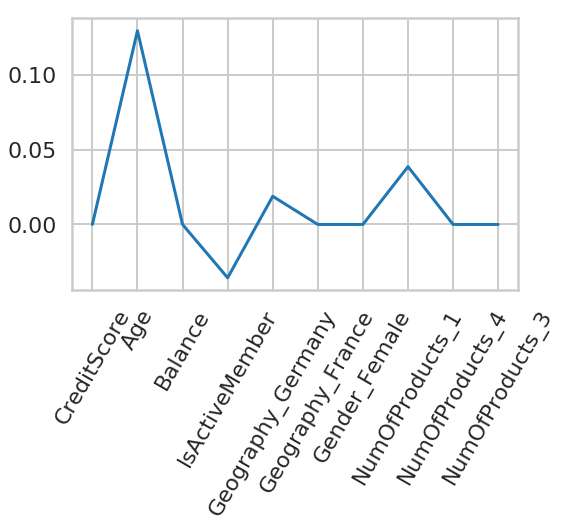

In [22]:
# Using Lasso to know features significance.
from sklearn.linear_model import Lasso
names = df.columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)-1), lasso_coef)
plt.xticks(range(len(names)-1), names, rotation=60)

# Applying:

In [23]:
X = df[['CreditScore', 'Age', 'Balance', 'IsActiveMember', 'Geography_Germany',
       'Geography_France', 'Gender_Female', 'NumOfProducts_1',
       'NumOfProducts_4', 'NumOfProducts_3']]
y = df['Exited']

In [24]:
# Splitting the data in test data and train data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

## Logistic Regression:

In [25]:
# Fitting the data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
accuracy_score(y_pred, y_test)

0.8356666666666667

In [26]:
# Using GridSearch to find the best parameters
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg_cv=GridSearchCV(logreg,grid,cv=10, scoring='accuracy', refit=True, n_jobs=-1)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
print(logreg_cv.best_estimator_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l1'}
accuracy : 0.8397142857142857
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [27]:
accuracy_score(logreg_cv.predict(X_test), y_test)

0.8356666666666667

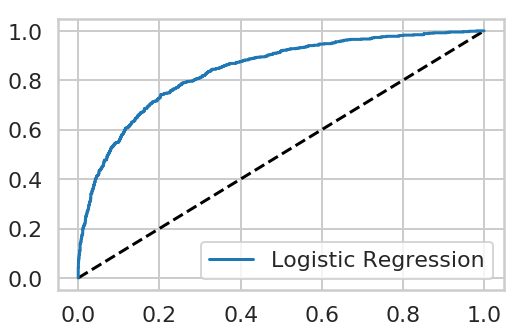

In [28]:
# ROC Curve
from sklearn.metrics import roc_curve

y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.legend()

In [29]:
# ROC AUC score. The area under ROC curve.
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_prob)

0.8411403299560001

In [30]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, logreg_cv.predict(X_test)))

#Tp#Fp
#Fn#Tn

[[2273   90]
 [ 403  234]]


In [31]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, logreg_cv.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.85      0.96      0.90      2363
           1       0.72      0.37      0.49       637

    accuracy                           0.84      3000
   macro avg       0.79      0.66      0.69      3000
weighted avg       0.82      0.84      0.81      3000



## kNN:

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
accuracy_score(knn.predict(X_test), y_test)

0.84

In [33]:
knn = KNeighborsClassifier()
k_grid={'n_neighbors':np.arange(1,20)}
knn_cv=GridSearchCV(knn, k_grid, cv=10, refit=True, n_jobs=-1)
knn_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)
print(knn_cv.best_estimator_)

tuned hpyerparameters :(best parameters)  {'n_neighbors': 14}
accuracy : 0.8471428571428572
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')


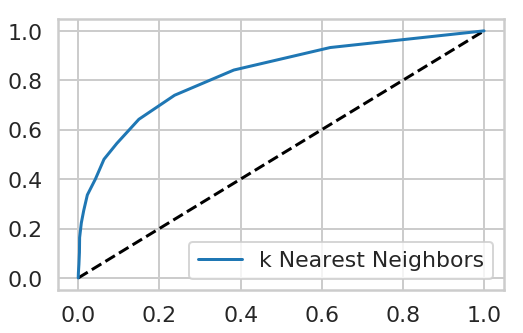

In [34]:
y_pred_prob = knn_cv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='k Nearest Neighbors')
plt.legend()

In [35]:
roc_auc_score(y_test, y_pred_prob)

0.8234161401140423

In [36]:
print(confusion_matrix(y_test, knn_cv.predict(X_test)))

#Tp#Fp
#Fn#Tn

[[2310   53]
 [ 423  214]]


In [37]:
print(classification_report(y_test, knn_cv.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.85      0.98      0.91      2363
           1       0.80      0.34      0.47       637

    accuracy                           0.84      3000
   macro avg       0.82      0.66      0.69      3000
weighted avg       0.84      0.84      0.81      3000



## SVM with 'rbf' Kernal:

In [38]:
from sklearn.svm import SVC

Cs = [0.1, 1, 10, 100]
gammas = [0.001, .01, 0.1, 1, 10]
param_grid = {'C': Cs, 'gamma': gammas,'kernel': ['rbf'], 'probability':[True]}

SVM_rbf_cv = GridSearchCV(SVC(), param_grid, cv=3, refit=True, n_jobs=-1)
SVM_rbf_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",SVM_rbf_cv.best_params_)
print("accuracy :",SVM_rbf_cv.best_score_)
print(SVM_rbf_cv.best_estimator_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
accuracy : 0.861
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [39]:
Cs = [1]
gammas = [0.1]
param_grid = {'C': Cs, 'gamma': gammas,'kernel': ['rbf'], 'probability':[True]}
SVM_rbf_cv_10 = GridSearchCV(SVC(), param_grid, cv=10, refit=True, n_jobs=-1)
SVM_rbf_cv_10.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",SVM_rbf_cv_10.best_params_)
print("accuracy :",SVM_rbf_cv_10.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
accuracy : 0.8594285714285714


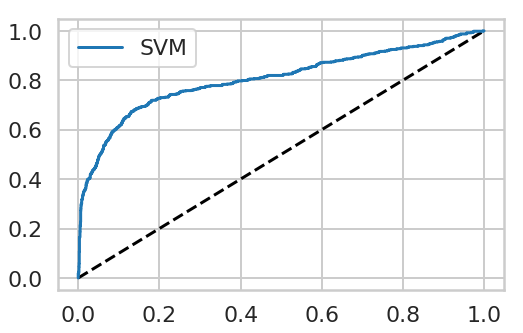

In [40]:
y_pred_prob = SVM_rbf_cv_10.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='SVM')
plt.legend()

In [41]:
roc_auc_score(y_test, y_pred_prob)

0.8056082421900692

In [42]:
print(confusion_matrix(y_test, SVM_rbf_cv_10.predict(X_test)))

#Tp#Fp
#Fn#Tn

[[2318   45]
 [ 403  234]]


In [43]:
print(classification_report(y_test, SVM_rbf_cv_10.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.85      0.98      0.91      2363
           1       0.84      0.37      0.51       637

    accuracy                           0.85      3000
   macro avg       0.85      0.67      0.71      3000
weighted avg       0.85      0.85      0.83      3000



## SVM with 'poly' Kernal

In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

Cs = [0.1, 1, 10, 100]
gammas = [0.001, .01, 0.1, 0.5]

param_grid = {'C': Cs, 'gamma': gammas,'probability':[True],'kernel': ['poly'],'degree':[2,3] }
SVM_poly_cv = RandomizedSearchCV(estimator = SVC(), param_distributions = param_grid, n_iter = 10, cv = 3, random_state=51, n_jobs = -1, refit=True)
SVM_poly_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",SVM_poly_cv.best_params_)
print("accuracy :",SVM_poly_cv.best_score_)
print(SVM_poly_cv.best_estimator_)

tuned hpyerparameters :(best parameters)  {'probability': True, 'kernel': 'poly', 'gamma': 0.5, 'degree': 2, 'C': 10}
accuracy : 0.8611428571428571
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.5, kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [45]:
from sklearn.model_selection import RandomizedSearchCV
Cs = [10]
gammas = [0.5]

param_grid = {'C': Cs, 'gamma': gammas,'probability':[True],'kernel': ['poly'],'degree':[2] }
SVM_poly_cv_10 = RandomizedSearchCV(estimator = SVC(), param_distributions = param_grid, n_iter = 10, cv = 10, random_state=51, n_jobs = -1, refit=True)
SVM_poly_cv_10.fit(X_train,y_train)

print("accuracy :",SVM_poly_cv_10.best_score_)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


accuracy : 0.861


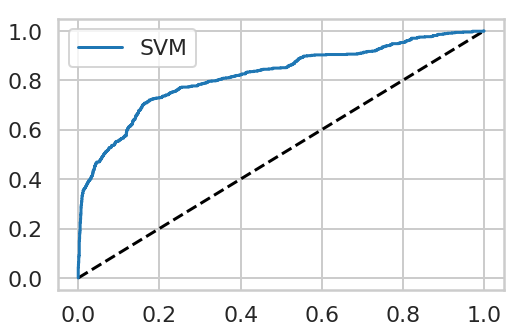

In [46]:
y_pred_prob = SVM_poly_cv_10.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='SVM')
plt.legend()

In [47]:
roc_auc_score(y_test, y_pred_prob)

0.8195403230467615

In [48]:
print(confusion_matrix(y_test, SVM_poly_cv_10.predict(X_test)))

#Tp#Fp
#Fn#Tn

[[2308   55]
 [ 392  245]]


In [49]:
print(classification_report(y_test, SVM_poly_cv_10.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.85      0.98      0.91      2363
           1       0.82      0.38      0.52       637

    accuracy                           0.85      3000
   macro avg       0.84      0.68      0.72      3000
weighted avg       0.85      0.85      0.83      3000



## Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

n_est = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)]
m_depth = [int(x) for x in np.linspace(5, 50, num = 5)]
min_samp = [3, 5, 6, 7, 10, 11]
m_ftr = ['auto']

param_grid = {'max_depth': m_depth, 'max_features': m_ftr,'n_estimators': n_est,'min_samples_split': min_samp}
RF_cv = RandomizedSearchCV(estimator = RandomForestClassifier(), n_iter=200, param_distributions =  param_grid, random_state=51, cv=3, n_jobs=-1, refit=True)
RF_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",RF_cv.best_params_)
print("accuracy :",RF_cv.best_score_)
print(RF_cv.best_estimator_)

tuned hpyerparameters :(best parameters)  {'n_estimators': 261, 'min_samples_split': 11, 'max_features': 'auto', 'max_depth': 16}
accuracy : 0.8602857142857143
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, n_estimators=261,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [51]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth': [16], 'max_features': ["auto"],'n_estimators': [155],'min_samples_split': [11]}
RF_cv_10 = RandomizedSearchCV(estimator = RandomForestClassifier(), n_iter=200, param_distributions =  param_grid, random_state=51, cv=10, n_jobs=-1, refit=True)
RF_cv_10.fit(X_train,y_train)

print("accuracy :",RF_cv_10.best_score_)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=200. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


accuracy : 0.8598571428571429


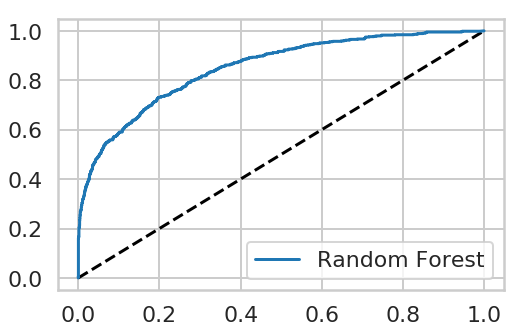

In [52]:
y_pred_prob = RF_cv_10.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.legend()

In [53]:
roc_auc_score(y_test, y_pred_prob)

0.8499592421362568

In [54]:
print(confusion_matrix(y_test, RF_cv_10.predict(X_test)))

#Tp#Fp
#Fn#Tn

[[2278   85]
 [ 348  289]]


In [55]:
print(classification_report(y_test, RF_cv_10.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.87      0.96      0.91      2363
           1       0.77      0.45      0.57       637

    accuracy                           0.86      3000
   macro avg       0.82      0.71      0.74      3000
weighted avg       0.85      0.86      0.84      3000



## Gaussian Naive Bayes:

In [56]:
from sklearn.naive_bayes import GaussianNB

nb_m = GaussianNB()
nb_m.fit(X_train,y_train)
y_pred = nb_m.predict(X_test)
accuracy_score(y_pred, y_test)

0.8126666666666666

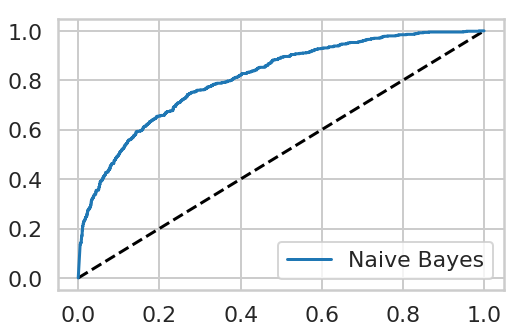

In [57]:
y_pred_prob = nb_m.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Naive Bayes')
plt.legend()

In [58]:
roc_auc_score(y_test, y_pred_prob)

0.8104300934540944

In [59]:
print(confusion_matrix(y_test, nb_m.predict(X_test)))

#Tp#Fp
#Fn#Tn

[[2352   11]
 [ 551   86]]


In [60]:
print(classification_report(y_test, nb_m.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.81      1.00      0.89      2363
           1       0.89      0.14      0.23       637

    accuracy                           0.81      3000
   macro avg       0.85      0.57      0.56      3000
weighted avg       0.83      0.81      0.75      3000



## Extreme Gradient boosting:

In [61]:
from xgboost import XGBClassifier

m_dep = [5,6,7,8]
gammas = [0.01,0.001,0.001]
min_c_wt = [1,5,10]
l_rate = [0.05,0.1, 0.2, 0.3]
n_est = [5,10,20,100]

param_grid = {'n_estimators': n_est, 'gamma': gammas, 'max_depth': m_dep,
              'min_child_weight': min_c_wt, 'learning_rate': l_rate}

xgb_cv = RandomizedSearchCV(estimator = XGBClassifier(), n_iter=100, param_distributions =  param_grid, random_state=51, cv=3, n_jobs=-1, refit=True)
xgb_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",xgb_cv.best_params_)
print("accuracy :",xgb_cv.best_score_)
print(xgb_cv.best_estimator_)

tuned hpyerparameters :(best parameters)  {'n_estimators': 20, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0.001}
accuracy : 0.8631428571428571
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.001,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [62]:
from xgboost import XGBClassifier

m_dep = [5]
gammas = [0.001]
min_c_wt = [1]
l_rate = [0.3]
n_est = [20]

param_grid = {'n_estimators': n_est, 'gamma': gammas, 'max_depth': m_dep,
              'min_child_weight': min_c_wt, 'learning_rate': l_rate}

xgb_cv_10 = RandomizedSearchCV(estimator = XGBClassifier(), n_iter=300, param_distributions =  param_grid, random_state=51, cv=10, n_jobs=-1, refit=True)
xgb_cv_10.fit(X_train,y_train)

print("accuracy :",xgb_cv_10.best_score_)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=300. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


accuracy : 0.8637142857142858


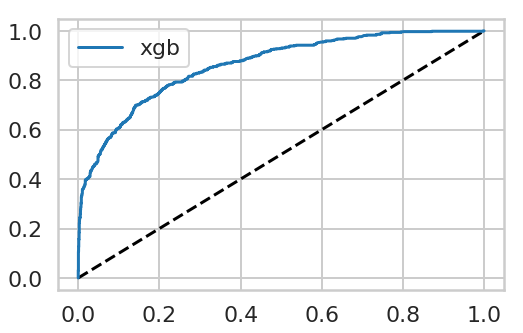

In [63]:
y_pred_prob = xgb_cv_10.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='xgb')
plt.legend()

In [64]:
roc_auc_score(y_test, y_pred_prob)

0.8617032867380489

In [65]:
print(confusion_matrix(y_test, xgb_cv_10.predict(X_test)))

#Tp#Fp
#Fn#Tn

[[2278   85]
 [ 352  285]]


In [66]:
print(classification_report(y_test, xgb_cv_10.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.87      0.96      0.91      2363
           1       0.77      0.45      0.57       637

    accuracy                           0.85      3000
   macro avg       0.82      0.71      0.74      3000
weighted avg       0.85      0.85      0.84      3000



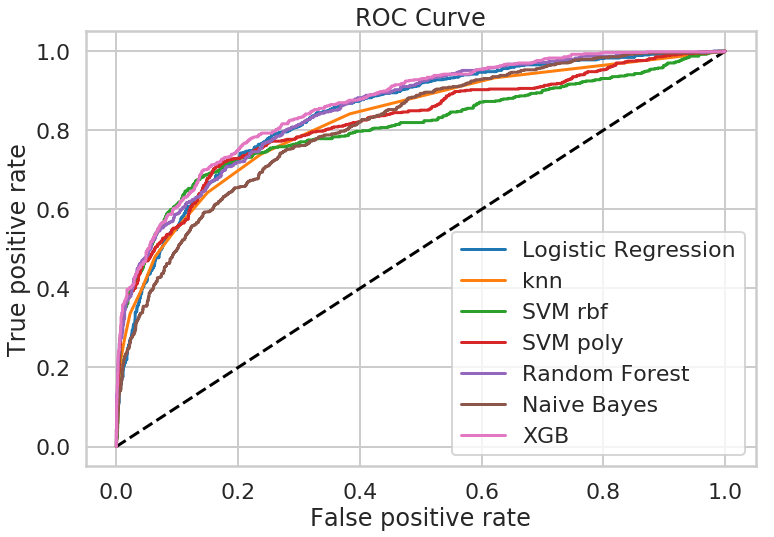

In [67]:
algos = [logreg_cv, knn_cv, SVM_rbf_cv, SVM_poly_cv, RF_cv, nb_m, xgb_cv]
labels = ['Logistic Regression', 'knn', 'SVM rbf', 'SVM poly', 'Random Forest','Naive Bayes', 'XGB']

plt.figure(figsize = (12,8))
plt.plot([0,1], [0,1], 'k--')

for i in range(len(algos)):
    y_pred_prob = algos[i].predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=labels[i])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')